<a href="http://www.pinsdaddy.com/pittsburgh-pa-area-map_LaF3VctaPpxf6lh1NCy0vAAlxhUWkl1212ESeozWFD8/"><img src="pittsburghmetrowallmap.jpg"></a>

<b>Column Descriptions:</b> <br>
PED : Pedestrian <br> 
BIC : Bicycle <br>
AVS : AVSafetyPotential <br>
FTC : FamiliarityTechnoology <br>
ZCD : ZipCode <br>
POP : Population <br>
AHI : AvgIncomeHouse <br>
ZHV : ZHVI <br>
ALB : AllBeneficiaries <br>
APP : FeelingsProvingGround / Approval <br>

In [2]:
# Use Python 2.7
# Import libraries necessary for this project
import csv
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

from collections import Counter

# Pretty display for notebooks
%matplotlib inline

# Load the Autonomus Vehicle Deployment in Pittsburgh dataset
data = pd.read_csv('AutonomousVD.csv')


''' 
neutral = data['APP']
disapproval = data['APP']
'''

population = data['POP']
income = data['AHI']
homevalue = data['ZHV']
beneficiaries = data['ALB']
zipcodes = data ['ZCD']


approval = data ['APP']
familiarity = data ['FTC']
    
# Success
print "\nAutonomus Vehicle Deployment dataset has {} survey responces with {} variables each.\n".format(*data.shape)


Autonomus Vehicle Deployment dataset has 938 survey responces with 10 variables each.



In [3]:
# Extract feature columns
feature_cols = list(data.columns[:-1])

# Extract target column 'passed'
target_col = data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column:\n{}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = data[feature_cols]
y_all = data[target_col]

# Show the feature information by printing the first five rows
print "\nSamle list of Values:"
print data.head()

Feature columns:
['PED', 'BIC', 'AVS', 'FTC', 'ZCD', 'POP', 'AHI', 'ZHV', 'ALB']

Target column:
APP

Samle list of Values:
   PED  BIC  AVS  FTC    ZCD    POP    AHI     ZHV   ALB  APP
0    1    1    0    2  15201  14326  27031  129000  2920    0
1    1    0    0    1  15201  14326  27031  129000  2920    0
2    1    0    2    1  15201  14326  27031  129000  2920    1
3    1    2    2    4  15201  14326  27031  129000  2920    0
4    0    1    1    3  15201  14326  27031  129000  2920    3


Statistics of Autonomus Vehicle Deployment in Pittsburgh Dataset with 938 responces:

Descriptoion of convertions:
0 = Disapproval, 1 = Somewhat disapproval, 
2 = Neutral, 
3 = Somewhat approval, 4 = Approval


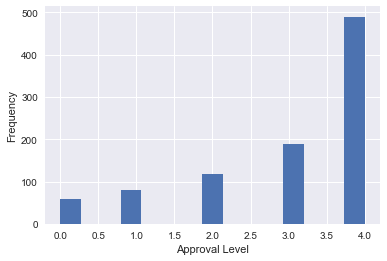

58, which is %6 of participants disapproving AV
81, which is %8 of participants somewhat disapproving AV
119, which is %12 of participants neutral with AV
190, which is %20 of participants somewhat approving AV
490, which is %52 of participants approving AV


Descriptoion of convertions:
0 = Not familiar, 1 = Mostly unfamiliar, 
2 = Somewhat familiar, 3 = Mostly familiar, 4 = Extremely familiar


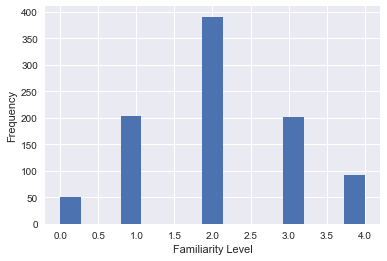

51, which is %5 of participants not familiar with AV
203, which is %21 of participants mostly unfamiliar with AV
391, which is %41 of participants somewhat familiar with AV
201, which is %21 of participants mostly familiar with AV
92, which is %9 of participants extremly familiar with AV


In [4]:
Approvals = Counter(approval)
Familiarities = Counter(familiarity)

print("Statistics of Autonomus Vehicle Deployment in Pittsburgh Dataset with 938 responces:\n")

print('Descriptoion of convertions:\n0 = Disapproval, 1 = Somewhat disapproval, \n2 = Neutral, \n3 = Somewhat approval, 4 = Approval')
plt.xlabel('Approval Level')
plt.ylabel('Frequency')
plt.hist(approval, bins = 15)
plt.show()

print "{}, which is %{} of participants disapproving AV".format(Approvals[0], 100*Approvals[0]/938)
print "{}, which is %{} of participants somewhat disapproving AV".format(Approvals[1], 100*Approvals[1]/938)
print "{}, which is %{} of participants neutral with AV".format(Approvals[2], 100*Approvals[2]/938)
print "{}, which is %{} of participants somewhat approving AV".format(Approvals[3], 100*Approvals[3]/938)
print "{}, which is %{} of participants approving AV".format(Approvals[4], 100*Approvals[4]/938)

print('\n\nDescriptoion of convertions:\n0 = Not familiar, 1 = Mostly unfamiliar, \n2 = Somewhat familiar, 3 = Mostly familiar, 4 = Extremely familiar')
plt.xlabel('Familiarity Level')
plt.ylabel('Frequency')
plt.hist(familiarity, bins = 15)
plt.show()

print "{}, which is %{} of participants not familiar with AV".format(Familiarities[0], 100*Familiarities[0]/938)
print "{}, which is %{} of participants mostly unfamiliar with AV".format(Familiarities[1], 100*Familiarities[1]/938)
print "{}, which is %{} of participants somewhat familiar with AV".format(Familiarities[2], 100*Familiarities[2]/938)
print "{}, which is %{} of participants mostly familiar with AV".format(Familiarities[3], 100*Familiarities[3]/938)
print "{}, which is %{} of participants extremly familiar with AV".format(Familiarities[4], 100*Familiarities[4]/938)

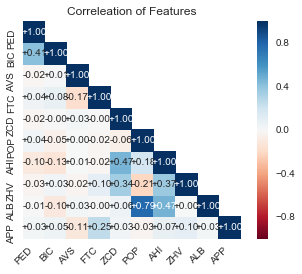

In [5]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.2f')
    plt.xticks(rotation=45, ha='right');
    plt.title('Correleation of Features')

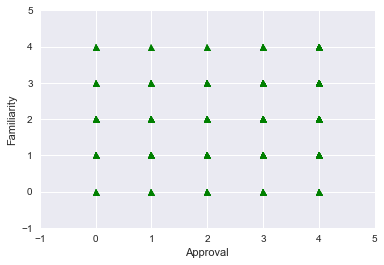

In [6]:
plt.xlabel('Approval')
plt.ylabel('Familiarity')
plt.plot(approval, familiarity, 'g^')
plt.axis([-1, 5, -1, 5])
plt.show()

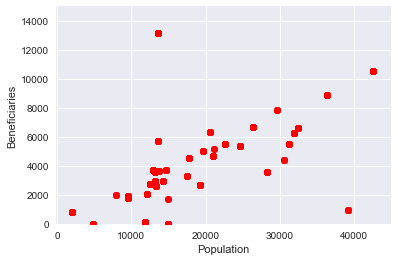

In [7]:
plt.xlabel('Population')
plt.ylabel('Beneficiaries')
plt.plot(population, beneficiaries, 'ro')
plt.axis([-100, 45000, 0, 15000])
plt.show()

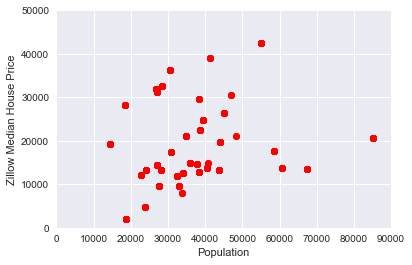

In [8]:
plt.xlabel('Population')
plt.ylabel('Zillow Median House Price')
plt.plot(income, population, 'ro')
plt.axis([0, 90000, 0, 50000])
plt.show()

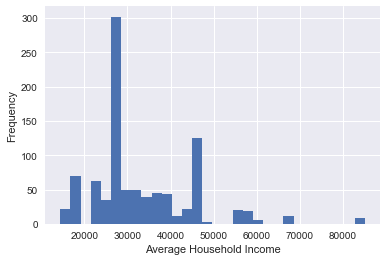

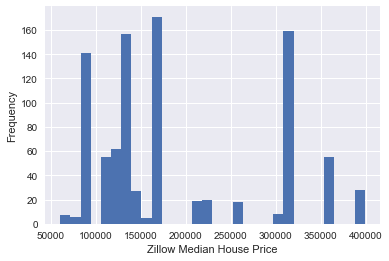

In [9]:
plt.xlabel('Average Household Income')
plt.ylabel('Frequency')
plt.hist(income, bins = 30)
plt.show()

plt.xlabel('Zillow Median House Price')
plt.ylabel('Frequency')
plt.hist(homevalue, bins = 30)
plt.show()

In [10]:
def preprocess_features(X):
    ''' Preprocesses the data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['1', '2'], [1, 1])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (9 total features):
['PED', 'BIC', 'AVS', 'FTC', 'ZCD', 'POP', 'AHI', 'ZHV', 'ALB']


In [11]:
# Set the number of training points
num_train = 700

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, train_size=num_train, random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 700 samples.
Testing set has 238 samples.


In [12]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='1', average='weighted')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

In [14]:
# from sklearn import model_B
# from skearln import model_C

# Initialize the three models
clf_A = tree.DecisionTreeClassifier(random_state=42)
clf_B = GaussianNB()
clf_C = svm.SVC(random_state=42)

# Set up the training set sizes
X_train_200 = 200
y_train_200 = 200

X_train_500 = 500
y_train_500 = 500

X_train_700 = 700
y_train_700 = 700

# Execute the 'train_predict' function for each classifier and each training set size
print "\n Model 1 200: DecisionTreeClassifier"
train_predict(clf_A, X_train[:X_train_200], y_train[:y_train_200], X_test, y_test)
print "\n Model 1 500: DecisionTreeClassifier"
train_predict(clf_A, X_train[:X_train_500], y_train[:y_train_500], X_test, y_test)
print "\n Model 1 700: DecisionTreeClassifier"
train_predict(clf_A, X_train, y_train, X_test, y_test)

print "\n Model 2 200: GaussianNB"
train_predict(clf_B, X_train[:X_train_200], y_train[:y_train_200], X_test, y_test)
print "\n Model 2 500: GaussianNB"
train_predict(clf_B, X_train[:X_train_500], y_train[:y_train_500], X_test, y_test)
print "\n Model 2 700: GaussianNB"
train_predict(clf_B, X_train, y_train, X_test, y_test)

print "\n Model 3 200: SVC"
train_predict(clf_C, X_train[:X_train_200], y_train[:y_train_200], X_test, y_test)
print "\n Model 3 500: SVC"
train_predict(clf_C, X_train[:X_train_500], y_train[:y_train_500], X_test, y_test)
print "\n Model 3 700: SVC"
train_predict(clf_C, X_train, y_train, X_test, y_test)


 Model 1 200: DecisionTreeClassifier
Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0011 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.9360.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.4090.

 Model 1 500: DecisionTreeClassifier
Training a DecisionTreeClassifier using a training set size of 500. . .
Trained model in 0.0015 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.8619.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.4243.

 Model 1 700: DecisionTreeClassifier
Training a DecisionTreeClassifier using a training set size of 700. . .
Trained model in 0.0018 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.8313.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.4052.

 Model 2 200: GaussianNB
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0006 seconds
Made predictions in 0.0003 seconds.
F1 sco

In [16]:
# Create the parameters list to tune
parameters = [{'C': [1, 10, 100, 200, 300, 400, 500, 600, 700, 1000, 10000],
   'gamma': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],
   'kernel': ['rbf'], 'tol':[1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
  }]

# Initialize the classifier
clf = svm.SVC()

# Make an f1 scoring function 
f1_scorer = make_scorer(f1_score, pos_label='1', average='macro')

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring = f1_scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
slf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(slf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(slf, X_test, y_test))

Made predictions in 0.0072 seconds.
Tuned model has a training F1 score of 0.8055.
Made predictions in 0.0025 seconds.
Tuned model has a testing F1 score of 0.4196.
